# Example: Vapour pressures and enthalpies of vaporisation of alkyl formamides

## Introduction

This example discusses the assessment of vapor pressure as a function of the temperature of pure N-butylformamide (Figure 1). Initially, we will approach a non-linear model for this assessment; soon after, we will use a linear model resulting from the linearization of the first model, in order to compare the results obtained by the evaluations of both models.

**Figure 1: N-butyl-formamide. Font: [1]**

<img src="../../imagens/formamida.png" alt="drawing" width="150"/>


The experimental data are preented in Table 1.

**Table 1. Experimental data. Font: [2].**

Temperature / K | Vapor pressure (Pa) | Vapor pressure uncertainties
:--------------:|:---------------------:|:-------------------------------:
        297.1   |         2.93          |        0.08 
        298.2   |         3.21          |        0.09
        299.3   |         3.49          |        0.09
        301.2   |         4.22          |        0.11
        304.2   |         5.60          |        0.17
        307.2   |         7.31          |        0.21
          .     |           .           |          .
          .     |           .           |          .
          .     |           .           |          .
        334.2   |          63.36        |        1.61
        337.1   |          78.93        |        2.00
        340.2   |          93.65        |        2.37
        343.2   |          115.11       |        2.90
        346.2   |          140.27       |        3.53
        349.1   |          171.89       |        4.32
        352.2   |          208.00       |        5.23
        
The vapor pressure model for this problem is given by [1]:

$P = exp(\frac{A}{R}+\frac{B}{RT})-\frac{{∆_l}^0{C^0}_p,m}{R}\ln(\frac{T}{T_0})$ (1)

where $ T $ is the saturation temperature, $ T_0 $ is the reference temperature (298 K), $ P $ is the vapor pressure at temperature $ T $, $ R $ is the gas constant (8,31446 $ JK ^ {- 1} mol ^ {- 1} $), $ {∆_l} ^ 0 \cdot{C_p, m} ^ 0 $, is the specific heat difference and $ A $ and $ B $ are the parameters to be estimated.

The optimization problem to be solved uses the objective function of least squares weighted by the inverse of the variance, according to [2]:

$\min_{A, B} \sum_{i=1}^{NE} \left(\frac{y^{exp}_i-y_i(A,B)}{u^2_{y_i}}\right)$ (2),

subject to (1).

The following symbols will be used to solve this problem in the MT_PEU:

* Symbols of the independent quantities (temperature): T
* Symbols of the dependent quantities (vapor pressure): p
* Symbols of the parameters: A, B

## Packages importing

Importing libraries (packages) needed to run the code.

* **MT_PEU**: library that contains the main functionalities of the tool

    * Import the class **EstimacaoNaoLinear**, that will be used in this non-linear estimation example.

* **casadi**: library for symbolic computation

    * The function **exp** (exponential) and **log** (logarithmic) will be necessary to build the model.

In [17]:
from sys import path 
path.append("../../modules")#A list of strings that specifies the search path for modules
from MT_PEU import EstimacaoNaoLinear
from casadi import exp, log

## Model creation

The model (1) represents the behavior of the dependent quantity in which the parameters $A$ and $B$ will be estimated.

This model is then defined in the form of a python subroutine (**def**) and represented by:

In [18]:
def Model(param, x, args):
    T = x[:, 0]
    A, B = param[0], param[1]

    return exp(A / 8.31446 + B / (8.31446 * T) - (68.2 / 8.31446) * log(T / 298.15))

## Class initialization

The first step to perform the estimation is to configure the class **EstimacaoNaoLinear** through the inclusion of basic information.:

* The model,
* List of symbols of the independent quantities *(T)*; 
* List of symbols for  uncertainty *(UT)*;
* List of symbols of the dependent quantities *(P)*; 
* List of symbols for  uncertainty *(UP)*;
* List of symbols of the parameters *(param)*;
* The project name, the folder's name where the results will be saved.

In [19]:
Estimation = EstimacaoNaoLinear(Model, symbols_x=[r'T'],symbols_ux=[r'uT'] ,symbols_y=[r'P'],symbols_uy=['uP'], symbols_param=['A','B'],  Folder='Example8' )


## Data inclusion

The experimental data provided in Table 1 of the dependent quantity (P) and the independent quantities (T), are presented below in the form of Spreadsheet:

**Figure 2: Spreadsheet example8. Font: [1]**


![Tanques](../../Imagens/data_ex8.png)


**Entering the experimental data in MT_PEU:**

The *setDados* method is used to include the data :


* The name of the file containing the data must be passed as a string or a list of strings.

In [20]:

Estimation.setDados(data="data_exa8.xlsx",glx=[], gly=[])

## Optimization

In this example, the user can choose the algorithm to be used in the optimization. 
Available: 'ipopt', 'bonmin' and 'sqpmethod'.

If the user does not choose any optimization method, the default algorithm will be used: ipopt, with initial estimative equal to [200, -80680.1]

**algorithm:** Informs the optimization algorithm that will be used. Each algorithm has its own keywords;

**optimizationReport:** Informs whether the optimization report should be created (True or False);

**parametersReport:** Informs whether the parameters report should be created (True or False).

In [21]:
Estimation.optimize(initial_estimative = [200, -80680.1], algorithm='ipopt', optimizationReport = True, parametersReport = False)


## Parameters uncertainty


In this example, it is possible to choose the method used to evaluate uncertainty. 
Available: 2InvHessiana, Geral, SensibilidadeModelo. 
By definition the likelihood region filling is 'True', if necessary this option can be changed.

**uncertaintyMethod:** method for calculating the covariance matrix of the parameters.

**parametersReport:** Informs whether the parameters report should be created (True or False).

**objectiveFunctionMapping:** Deals with mapping the objective function (True or False).

If the user **does not** have an interest in **evaluating the uncertainty of the parameters**, just **do not** perform **Estime.parametersUncertainty**.

In [22]:
Estimation.parametersUncertainty(uncertaintyMethod='SensibilidadeModelo', objectiveFunctionMapping=True, parametersReport = True)


## Prediction and residual analysis

The prediction method evaluates the dependent quantity based on the estimated parameters, the model informed by the user, and data of the dependent quantities. In case validation data are informed (through the setConjunto method, defining "dataType = predicao") these will be used to perform the prediction. Also, this method evaluates the covariance matrix of the prediction, in case the parametersUncertainty method has been performed.
 
Through residual analysis, it is possible to obtain indicators of estimation quality.  Aspects such as mean, homoscedasticity (which allows us to infer possible dependency and/or tendency relationships between the variables), normality, $R^2$ and autocorrelation are evaluated. The optimal point of the objective function is also evaluated. The residues analysis is performed primarily with the validation data.

**export_y:** Exports the calculated data of y, its uncertainty, and degrees of freedom in a txt with comma separation (True or False);

**export_y_xls:** Exports the calculated data of y, its uncertainty, and degrees of freedom in a xls (True or False);

**export_cov_y:** Exports the covariance matrix of y (True or False);

**export_x:** Exports the calculated data of x, its uncertainty, and degrees of freedom in a txt with comma separation(True or False);

**export_cov_x:** Exports the covariance matrix of x (True or False).

In [23]:
Estimation.prediction(export_y=True,export_y_xls=True, export_cov_y=True, export_x=True, export_cov_x=True)
Estimation.residualAnalysis(report=True)

## Plots and reports

At this stage, the results obtained by the program are exported: reports and graphs. 
The graphs are generated according to the steps that have been performed. In the reports, information about the statistical tests, objective function value, covariance matrix of the parameters, optimization status, among others, are printed.

In [24]:
Estimation.plots()

<Figure size 432x288 with 0 Axes>

<Figure size 360x240 with 0 Axes>

# Linear Model

## Introduction

In this second stage, an assessment of the vapor pressure as a function of temperature is carried out using the first linearized model.

The model used to estimate the vapor pressure of N-butyl-formamide is given by
Equation (3).

$\ln\left(\frac{P_sat}{P_ref}\right) = \frac{A}{R}+\frac{B}{RT}+\frac{{∆_l}^0{C^0}_p,m}{{C_p,m}^0}\ln(\frac{T}{T_0})$ (3)

where $ T $ is the saturation temperature, $ T_0 $ is the reference temperature (298 K), $ P_ {sat} $ is the vapor pressure at temperature $ T $, $ P_ {ref} $ is the pressure of reference (1 Pa), $ R $ is the gas constant (8,31446 $ JK ^ {- 1} mol ^ {- 1} $), $ {∆_l} ^ 0 \ cdot {C_p, m} ^ 0 $, the specific heat difference and $ A $ and $ B $ are the parameters to be estimated.

Equation (1) can be rearranged to take the following form:

$Y = \ln\left(\frac{P_sat}{P_ref}\right)-\frac{{∆_l}^0{C^0}_p,m}{{C_p,m}^0}\ln(\frac{T}{T_0})=\frac{A}{R}+\frac{B}{RT}$ (4)

Assuming $Y = \ln\left(\frac{P_sat}{P_ref}\right)-\frac{{∆_l}^0{C^0}_p,m}{{C_p,m}^0}\ln(\frac{T}{T_0})$, $B_1 = \frac{A}{R}$, $A_1 = \frac{B}{R}$ and $X = \frac{1}{T}$


Equation (4) can be rewritten as follows:

$Y = A_1\cdot X + B_1 $ (5)

The optimization problem to be solved uses the objective function of least squares weighted by the inverse of the variance, according to [6]:

$\min_{A_1, B_1} \sum_{i=1}^{NE} \left(\frac{y^{exp}_i-y_i(A_1,B_1)}{u^2_{y_i}}\right)$ (6)

The following symbols will be used to solve this problem in the MT_PEU:

* Symbols of the independent quantities: $X$
* Symbols of the dependent quantities: $Y$
* Symbols of the parameters: $A_1,B_1$.

## Packages importing

Importing libraries (packages) needed to run the code.
    
* **MT_PEU_Linear**: library that contains the main functionalities of the tool

    * Import the class **EstimacaoLinear**, that will be used in this linear estimation example.
    
* **Numpy**: fundamental package for matrix computing with Python

    * The function **log** (logarithmic) and array will be necessary to build the model.

In [25]:

from MT_PEU_Linear import EstimacaoLinear
from numpy import log, array

## Class initialization

The first step to perform the estimation is to configure the class **EstimacaoLinear** through the inclusion of basic information.:

* List of symbols of the independent quantities *($X$)*; 
* List of symbols of the dependent quantities *($Y$)*; 
* List of symbols of the parameters *($A_1,B_1$)*;
* The project name, the folder's name where the results will be saved.

In [26]:
ER = EstimacaoLinear(symbols_x=[r'X1'],symbols_ux=[r'uX1'], symbols_y=[r'Y1'],symbols_uy=[r'uY1'] ,symbols_param=['A1','B1'],  folder='Example8Linear')


Definition of new variables:

In [27]:
T =Estimation.x.estimacao.matriz_estimativa.transpose()[0]

# Output data
P =Estimation.y.estimacao.matriz_estimativa.transpose()[0]
# Output data uncertainty
uP =Estimation.y.estimacao.matriz_incerteza.transpose()[0]

#Input observed data
X = 1./T
#Output observed data
Y = log(P) - (-68.2 / 8.31446)*log(T/298.15)


MT_PEU **needs** the **uncertainties of the experimental data** (uT, uP, uX and uY) to be informed.

In [28]:
# Input data uncertainty
uT =Estimation.x.estimacao.matriz_incerteza.transpose()[0]

# Output data uncertainty
uP =Estimation.y.estimacao.matriz_incerteza.transpose()[0]


#Propagation of uncertainty
#uncertainty of input observed data
uX = ((-1/(T**2))**2*uT**2)**0.5

#uncertainty of output observed data
uY = ((1/P)**2*uP**2 + (-1*-68.2/(8.31446*T))**2*uT**2)**0.5


**Entering the experimental data in MT_PEU:**

The *setDados* method is used to include the data for dependent and independent quantities. Syntax:

* The experimental data and their uncertainties must be entered  in the form of dictionary.


In [29]:
ER.setDados(data={'X1':X,'uX1':uX,'Y1':Y,'uY1':uY},glx=[],gly=[])

## Optimization

**parametersReport:** Informs whether the parameters report should be created (True or False).

In [30]:
ER.optimize(parametersReport=True)

## Parameters uncertainty

In this example, it is possible to choose the method used to evaluate uncertainty. 
Available: 2InvHessiana, Geral, SensibilidadeModelo. 
By definition the likelihood region filling is 'True', if necessary this option can be changed.

If the user **does not** have an interest in **evaluating the uncertainty of the parameters**, just **do not** perform **ER.parametersUncertainty**.

**objectiveFunctionMapping:** Deals with mapping the objective function (True or False).

In [31]:
ER.parametersUncertainty(objectiveFunctionMapping=True)

## Prediction and residual analysis

The prediction method evaluates the dependent quantity based on the estimated parameters, the model informed by the user, and data of the dependent quantities. In case validation data are informed (through the setConjunto method, defining "dataType = predicao") these will be used to perform the prediction. Also, this method evaluates the covariance matrix of the prediction, in case the parametersUncertainty method has been performed.
 
Through residual analysis, it is possible to obtain indicators of estimation quality.  Aspects such as mean, homoscedasticity (which allows us to infer possible dependency and/or tendency relationships between the variables), normality, $R^2$ and autocorrelation are evaluated. The optimal point of the objective function is also evaluated. The residues analysis is performed primarily with the validation data.

**export_y:** Exports the calculated data of y, its uncertainty, and degrees of freedom in a txt with comma separation (True or False);

**export_y_xls:** Exports the calculated data of y, its uncertainty, and degrees of freedom in a xls (True or False);

**export_cov_y:** Exports the covariance matrix of y (True or False);

**export_x:** Exports the calculated data of x, its uncertainty, and degrees of freedom in a txt with comma separation(True or False);

**export_cov_x:** Exports the covariance matrix of x (True or False).

In [32]:
ER.prediction(export_y=True,export_y_xls=True, export_cov_y=True, export_x=True, export_cov_x=True)
ER.residualAnalysis(report=True)

## Plots and reports

At this stage, the results obtained by the program are exported: reports and graphs. 
The graphs are generated according to the steps that have been performed. In the reports, information about the statistical tests, objective function value, covariance matrix of the parameters, optimization status, among others, are printed.

ValueError: The number of FixedLocator locations (46), usually from a call to set_ticks, does not match the number of ticklabels (23).

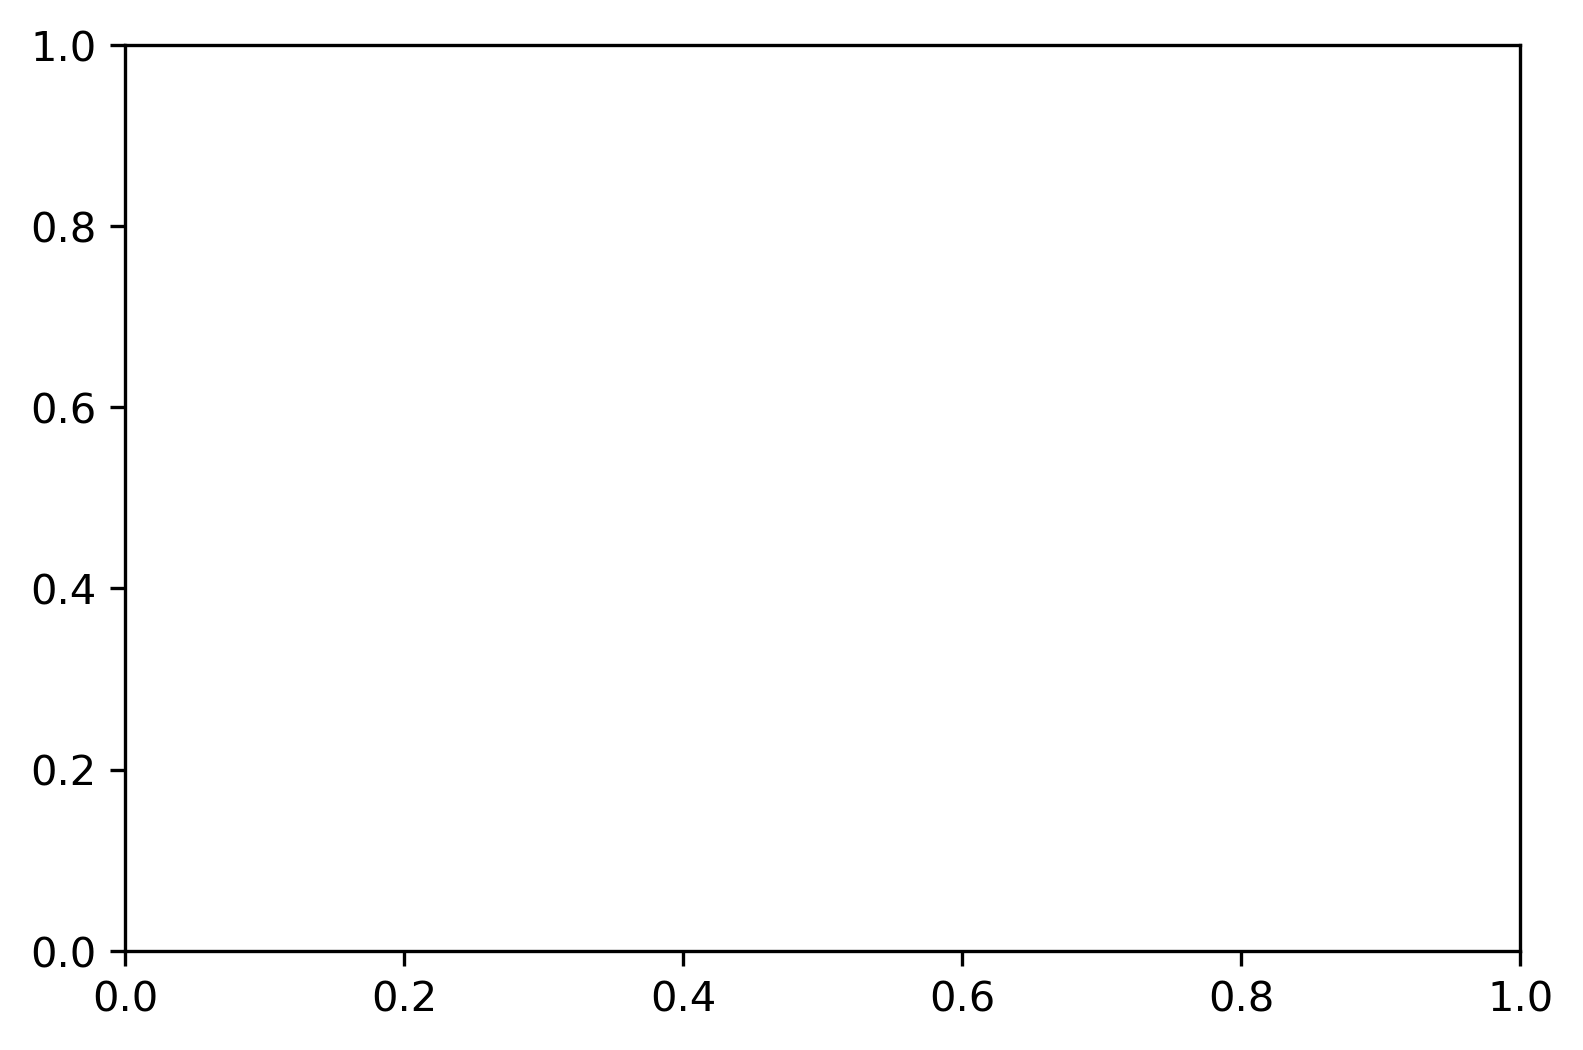

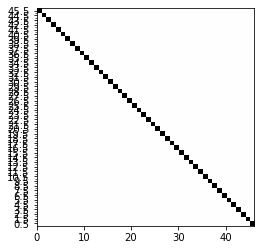

In [33]:
ER.plots()
ER.reports()

## Comparison of results

Through Table 2, it is possible to see that, regardless of the model used, the parameters
estimates were very close to those described by the article.

**Table 2. Comparison between the parameters obtained by each example.**

 Model     | $A_1$   | $B_1$|   A      |     B
:---------:|:-------:|:----:|:--------:|:---------:
 Linear    |-10790.0 | 37.3 |   310.5  | -89719.0
 Não-Linear|    -    |  -   |   310.5  | -89720.0
 Artigo    |    -    |  -   |   310.5  | -89681.9
 
Table 3 presents the results of the statistical tests carried out for the waste used by the
charge performed with each model. It is noticed that, for the Non-linear model, the residuals
did not pass the normality tests confronted one of the premises assumed for the use of the weighted minimum objective function weighted by the variation, or that makes a
statistical interpretation of the selected results. In addition, waste does not pass the test
selectable and inadequate homoscedasticity for estimated parameters. Yet,
to use the linear model or residuals Passed in the **normality** and **homoscedasticity** tests.

**Table 3. Comparison between the parameters obtained by each example.**

 Statistics                           | Linear p-value | Nonlinear p-value
:------------------------------------:|:--------------:|:-----------------:
 Normality/normaltest                 |         0.871  |      0.006       
 Normality/shapiro                    |         0.903  |      0.013  
 average/ttest                        |         0.978  |      0.973     
 Autocorrelation/Ljung-Box chi2       |         0.729  |      0.599
 Homoscedasticity/Bresh Pagan teste F |         0.754  |      0.026
 
The transformation of the initial (non-linear) model resulted not only in obtaining
very close parameters, but also in better statistical results, as seen in Figure 2:

**Figure 2: Coverage regions.**

![](../../Imagens/RegAbrangencia.png)


## References: 

[1] SANJARI, Ehsan. A new simple method for accurate calculation of saturated vapor pressure. Elsevier. 
p. 12-16. mar. 2013.

[2] ZAITSEVA, Ksenia V.; ZAITSAU, Dzmitry H.; VARFOLOMEEV, Mikhail A.. 
Vapour pressures and enthalpies of vaporisation of alkyl formamides. Elsevier. Alemanha, p. 228-238. maio 2019.

[3] INMETRO.: Avaliação de dados de medição — Guia para a expressão de incerteza de medição. Rio de Janeiro: Jcgm, 2008.